In [49]:
#The point of this notebook is to follow along with the youtube channel
#sentdex. Most of the code here belongs to him. Comments are my own

In [50]:
print('hello world')
import quandl
import pandas as pd

hello world


In [51]:
#Getting google stock information
df = quandl.get('WIKI/GOOGL')
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.150,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.550,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [52]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]

In [53]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df

C:\Users\stevl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\stevl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0


In [54]:
import math
#Declare forecast column as a variable to increase code reusability
forecast_col = 'Adj. Close'

#Fill null values with an outlier
df.fillna(-9999, inplace = True)

#Predict 1% in advance, which is 30 days
forecast_out = int(math.ceil(0.01 * len(df)))

#This means that the label column, in this case 'Adj. Close' is the close
#price, several days into the future
df['label'] = df[forecast_col].shift(-forecast_out)
df.head(10)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849
2004-08-26,54.122070,0.037068,2.820391,7094800.0,72.278116
2004-08-27,53.239345,2.326896,-1.803885,6211700.0,74.810934
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,74.199045
2004-08-31,51.343492,1.308977,0.048866,4917800.0,70.462511


In [55]:
df.columns

Index(['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume', 'label'], dtype='object')

In [56]:
#Imports to support model building
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

#X values are all values used to predict the label. 1 indicates to drop a column
X = np.array(df.drop('label',1))

df.dropna(inplace = True)
#y values are the value to predict, so it is just an array of labels
y = np.array(df['label'])

#Scale all X to prevent any variable from having outsized effect
X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out:]
#Train test split to make the data ready for testing
#Test size indicates the percent of held out data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

#clf is the classifier, which we then fit to the training data using the
#training labels
#n_jobs is possible when multithreading can be done. A value of -1
#is the maximum number of jobs which can be performed by the system
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
#Find out how well the model performs in terms of percent accuracy
accuracy = clf.score(X_test,y_test)

print(accuracy)

0.9800173793329692


In [57]:
#Perform the same experiment using a support vector machine model
#Performance is significantly worse
#Commenting out so I can run all cells
'''
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)
'''


'\nclf = svm.SVR()\nclf.fit(X_train, y_train)\naccuracy = clf.score(X_test,y_test)\nprint(accuracy)\n'

In [58]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1078.20880083 1092.97959286 1107.00527194 1101.69547738 1095.19233772
 1092.54157732 1091.02040776 1088.00699958 1081.71562161 1077.31333973
 1075.0746903  1094.27150015 1112.68274429 1117.37013774 1132.32611438
 1136.34529859 1135.11496411 1132.57261639 1134.41094619 1152.55497899
 1151.63290804 1162.08229747 1158.60783823 1166.39267158 1186.38403331
 1199.03814495 1193.19010419 1205.32298245 1211.00795845 1208.72307123
 1199.48402143 1205.28414154 1203.76362184 1139.33307869 1085.32096515] 0.9800173793329692 35


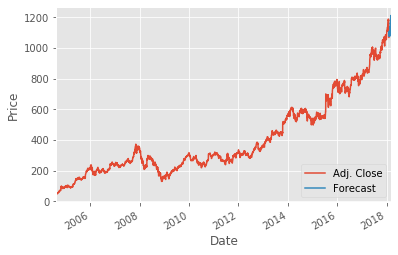

In [59]:
#Imports to perform graphing
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

#Specify ggplot arbitrarily to make the graph look good
style.use('ggplot')

#Fill initial forcast column with nans
df['Forecast'] = np.nan

#Take the name of the last row, get the timestamp, add one day to 
#Get the next day
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

#Get the next date for labelling, then for the row of that daye, add the
#Forecase variable from the forecast set
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
    
#Plot the graph with forecast
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [60]:
#Necessary for saving model
import pickle

#Save the file to the same folder as linearregression.pickle
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [62]:
#Open the classifier from the saved file
clf = pickle.load(open('linearregression.pickle', 'rb'))

In [63]:
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)